## Import necessary packages/libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset & Exploring it

In [53]:
df = pd.read_csv("data.csv")

In [54]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [56]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [57]:
df.shape

(11914, 16)

## Data Pre-processing

### Handling missing data

In [58]:
df['Engine Fuel Type'].fillna('Unknown', inplace=True)
df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)
df['Market Category'].fillna('Unknown', inplace=True)

In [59]:
#removing outliers (using IQR method)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [60]:
numerical_columns = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'MSRP']
for col in numerical_columns:
    df = remove_outliers(df, col)

In [61]:
#new shape of dataset
df.shape

(9843, 16)

In [62]:
#check if there are anymore null values present in dataset
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

## Exploratory Data Analysis (EDA)

### Questions to answer
1. What is the distribution of car prices (MSRP)?
2. How does engine horsepower relate to price?
3. What are the top 10 most popular car makes?
4. How does the number of cylinders affect fuel efficiency (highway MPG)?
5. What is the trend of average car prices over the years?
6. How does transmission type affect city MPG?
7. What is the relationship between vehicle size and price?

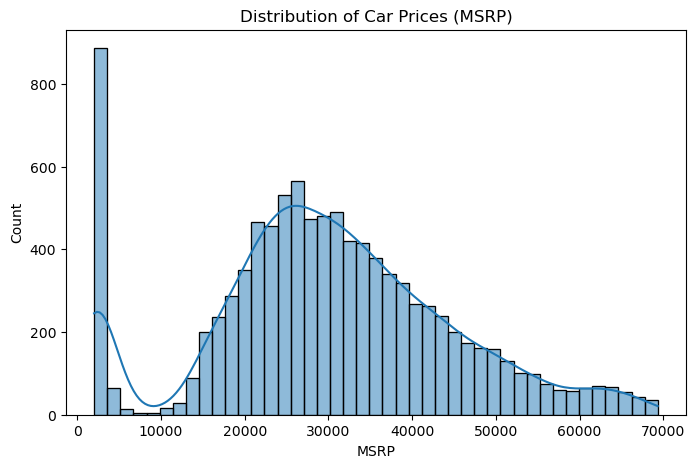

In [63]:
#question 1
plt.figure(figsize=(8, 5))
sns.histplot(df['MSRP'], kde=True)
plt.title('Distribution of Car Prices (MSRP)')
plt.xlabel('MSRP')
plt.ylabel('Count')
plt.show()

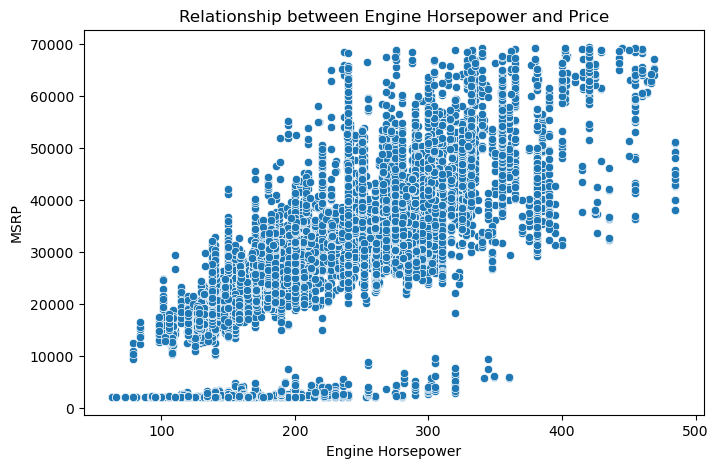

In [64]:
# question 2
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Engine HP', y='MSRP', data=df)
plt.title('Relationship between Engine Horsepower and Price')
plt.xlabel('Engine Horsepower')
plt.ylabel('MSRP')
plt.show()

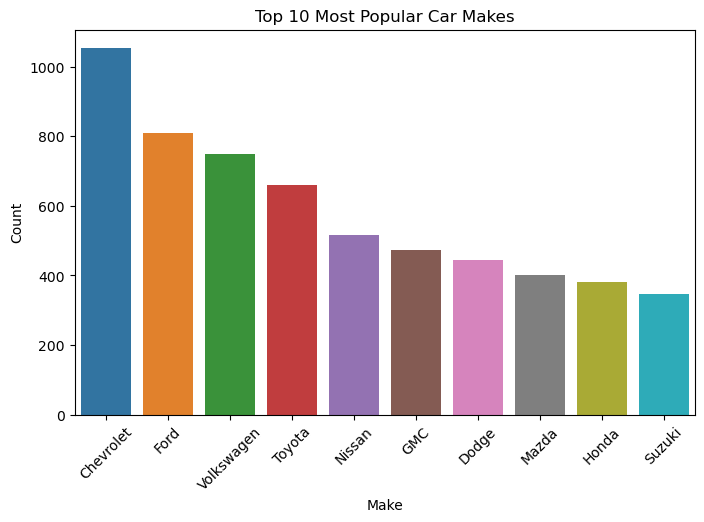

In [65]:
# question 3
top_10_makes = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_makes.index, y=top_10_makes.values)
plt.title('Top 10 Most Popular Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

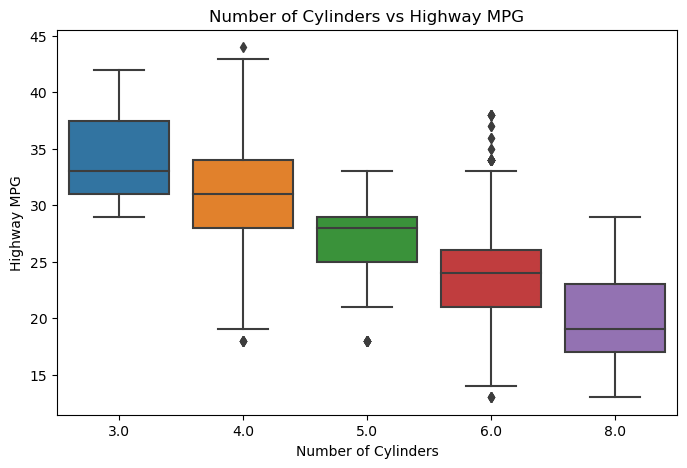

In [66]:
# question 4
plt.figure(figsize=(8, 5))
sns.boxplot(x='Engine Cylinders', y='highway MPG', data=df)
plt.title('Number of Cylinders vs Highway MPG')
plt.xlabel('Number of Cylinders')
plt.ylabel('Highway MPG')
plt.show()

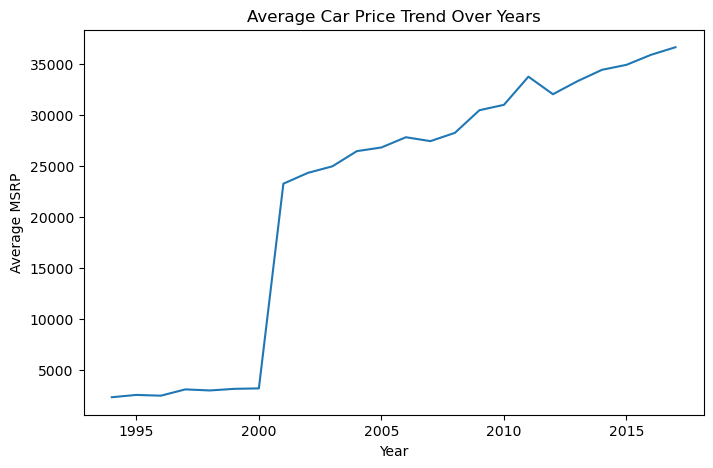

In [67]:
# question 5
yearly_avg_price = df.groupby('Year')['MSRP'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='MSRP', data=yearly_avg_price)
plt.title('Average Car Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average MSRP')
plt.show()

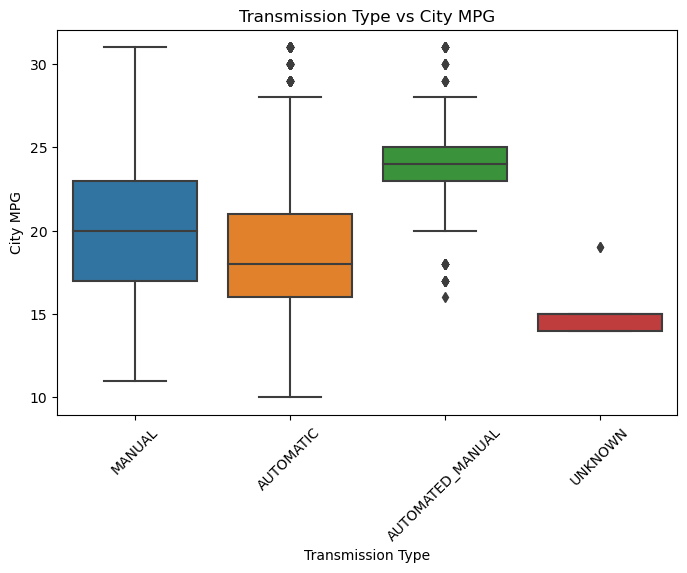

In [68]:
# question 6
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission Type', y='city mpg', data=df)
plt.title('Transmission Type vs City MPG')
plt.xlabel('Transmission Type')
plt.ylabel('City MPG')
plt.xticks(rotation=45)
plt.show()

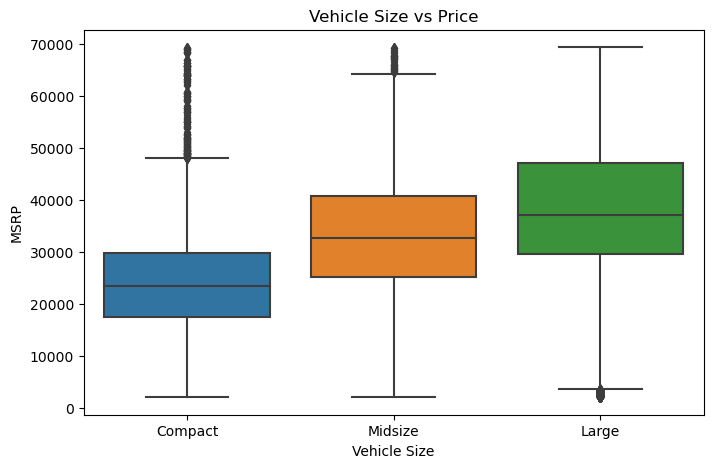

In [69]:
# question 7
plt.figure(figsize=(8, 5))
sns.boxplot(x='Vehicle Size', y='MSRP', data=df)
plt.title('Vehicle Size vs Price')
plt.xlabel('Vehicle Size')
plt.ylabel('MSRP')
plt.show()